In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv('california_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
df.shape

(20640, 10)

In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [22]:
# because our missing values arent significatly much and will likely not affect our model we can drop them
df = df.dropna()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
df.duplicated().sum()

0

In [26]:
# split our model into training and testing
from sklearn.model_selection import train_test_split


# assigning our target variable to y
x = df.drop (columns = ['median_house_value'])
y = df['median_house_value']

In [27]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [28]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [31]:
# splitting the data into training and testing 
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2)

In [32]:
# join the x_training data with the y_testing data to carry out some basic correlations
train_data = x_train.join(y_train)

In [34]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17725,-121.80,37.32,20.0,2473.0,476.0,2228.0,501.0,5.6817,<1H OCEAN,224200.0
4953,-118.31,34.01,39.0,2073.0,566.0,1246.0,547.0,2.0417,<1H OCEAN,117100.0
18468,-121.61,37.15,16.0,5498.0,729.0,2051.0,694.0,7.8601,<1H OCEAN,416300.0
3286,-122.53,39.09,11.0,1264.0,271.0,370.0,177.0,1.3000,INLAND,69700.0
7760,-118.14,33.91,34.0,2011.0,472.0,1087.0,423.0,3.0465,<1H OCEAN,187800.0


## EXPLORATORY DATA ANALYSIS

In [29]:
# SweetViz is an open-source Python library, used for automated exploratory data analysis (EDA), 
# it helps data analysts/scientists quickly generate beautiful & highly detailed visualizations
# !pip install sweetviz

import sweetviz as sv

In [35]:
report = sv.analyze (train_data)
report

                                             |                                             | [  0%]   00:00 ->…

In [36]:
# Display the report in the notebook
report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

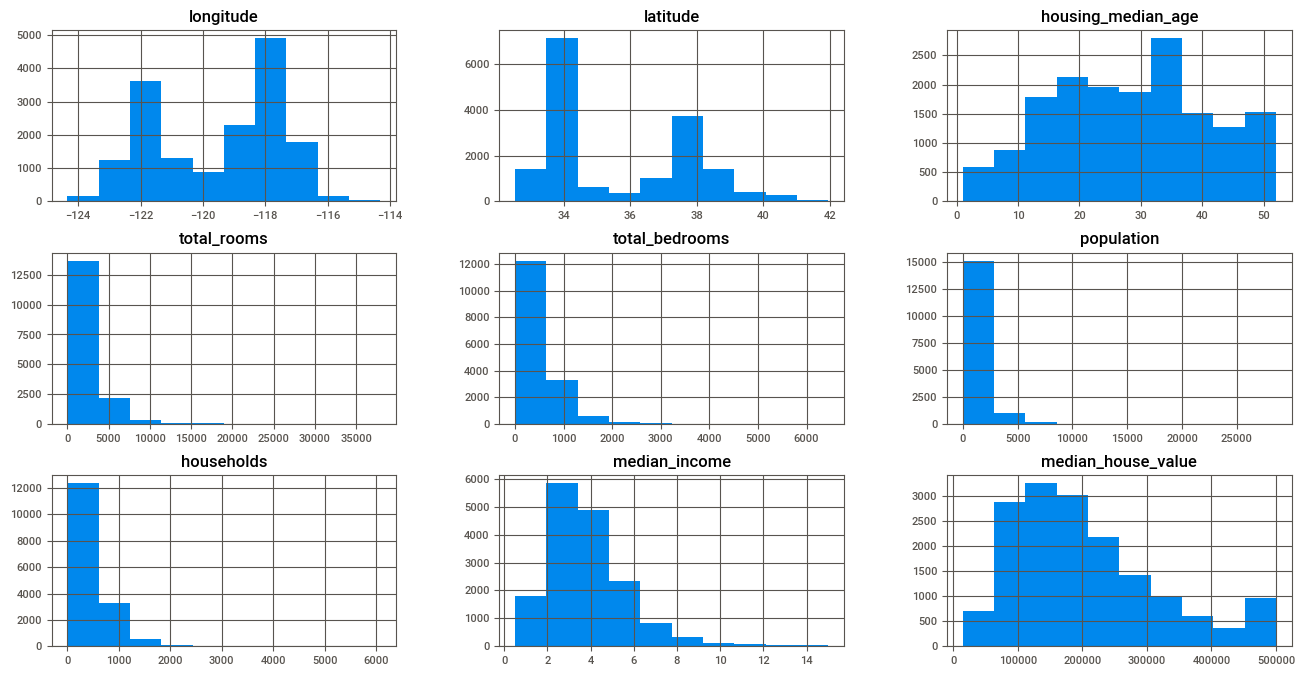

In [37]:
# some basic explorations of the numerical data and view multiple distribution of individual features
train_data.hist(figsize = (16,8))

In [39]:
# view the correlation of the features with the target variable
train_data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_26016\2922838644.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924177,-0.105880,0.045252,0.067735,0.098478,0.054050,-0.018218,-0.048962
latitude,-0.924177,1.000000,0.006914,-0.035433,-0.063757,-0.106250,-0.068179,-0.078126,-0.142233
housing_median_age,-0.105880,0.006914,1.000000,-0.364049,-0.323840,-0.304782,-0.306242,-0.117316,0.110455
total_rooms,0.045252,-0.035433,-0.364049,1.000000,0.931607,0.864782,0.919752,0.198850,0.130809
total_bedrooms,0.067735,-0.063757,-0.323840,0.931607,1.000000,0.885485,0.979005,-0.006481,0.046551
population,0.098478,-0.106250,-0.304782,0.864782,0.885485,1.000000,0.915072,0.006051,-0.027815
households,0.054050,-0.068179,-0.306242,0.919752,0.979005,0.915072,1.000000,0.014982,0.062145
median_income,-0.018218,-0.078126,-0.117316,0.198850,-0.006481,0.006051,0.014982,1.000000,0.691317
median_house_value,-0.048962,-0.142233,0.110455,0.130809,0.046551,-0.027815,0.062145,0.691317,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_26016\1086902818.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')


<Axes: >

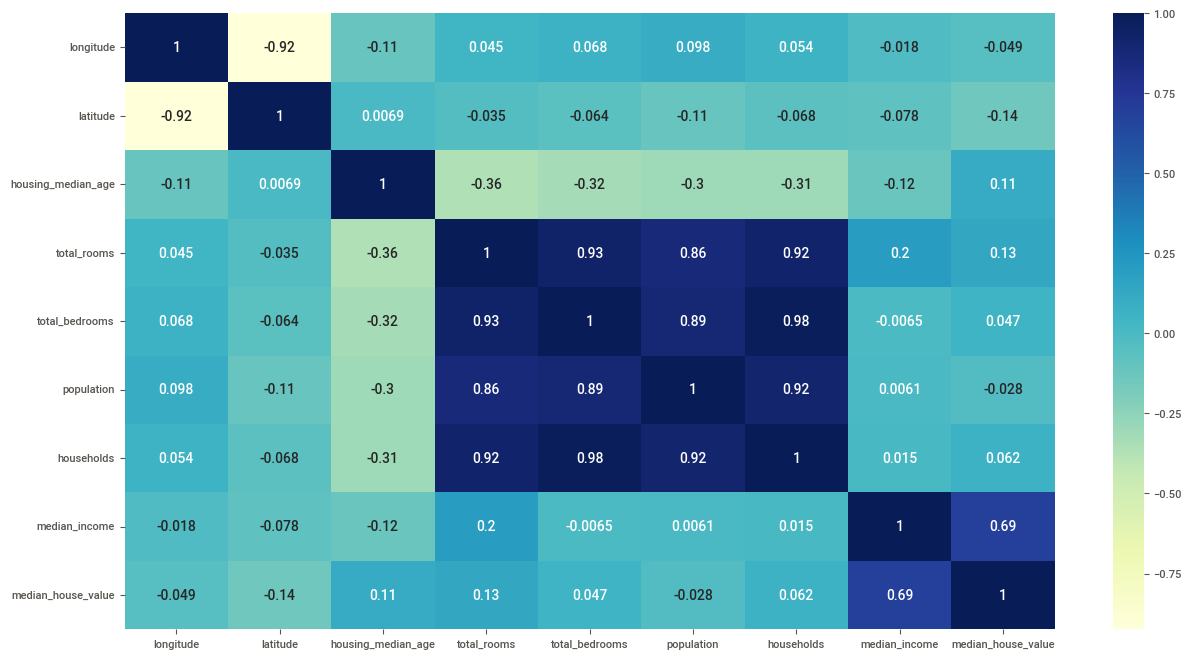

In [42]:
# plotting a heatmap of the correlations
plt.figure (figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

## DATA PREPROCESSING

In [44]:
# some of our features are rightly skewewed and what we can do to such features is to take their logs
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

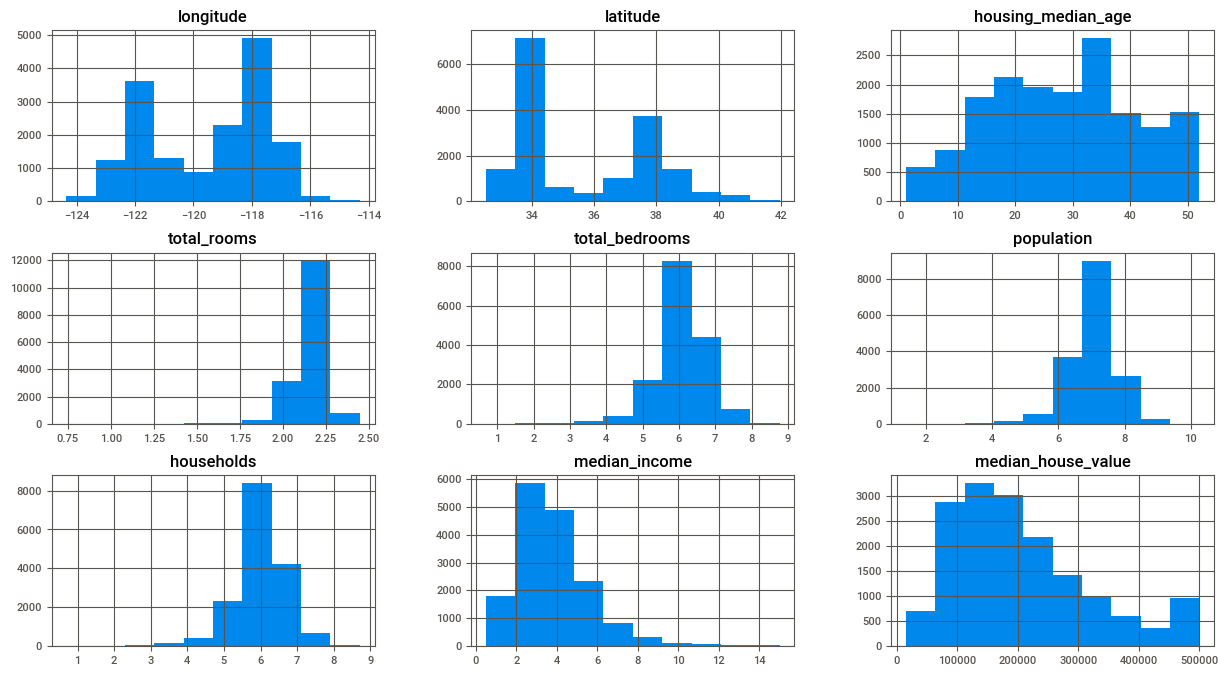

In [45]:
train_data.hist(figsize = (15,8))
# visuals have looked more like a normal visualization

In [47]:
# One hot encode (get_dummies) for our categorical features to numerical ones
train_data = pd.get_dummies (train_data)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17725,-121.80,37.32,20.0,2.176295,6.167516,7.709308,6.218600,5.6817,224200.0,1,0,0,0,0
4953,-118.31,34.01,39.0,2.156082,6.340359,7.128496,6.306275,2.0417,117100.0,1,0,0,0,0
18468,-121.61,37.15,16.0,2.263046,6.593045,7.626570,6.543912,7.8601,416300.0,1,0,0,0,0
3286,-122.53,39.09,11.0,2.097137,5.605802,5.916202,5.181784,1.3000,69700.0,0,1,0,0,0
7760,-118.14,33.91,34.0,2.152562,6.159095,6.992096,6.049733,3.0465,187800.0,1,0,0,0,0


<Axes: >

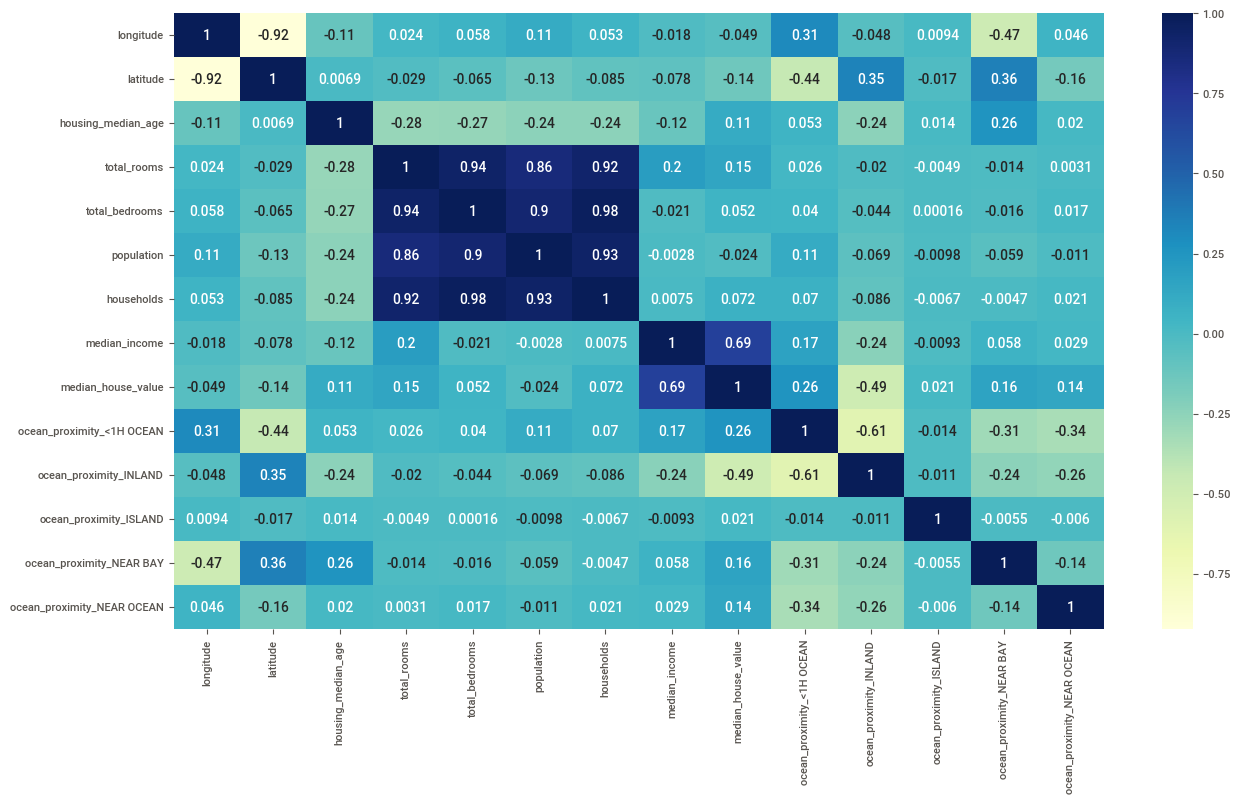

In [48]:
# check the correlations of our new features with the target
plt.figure (figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

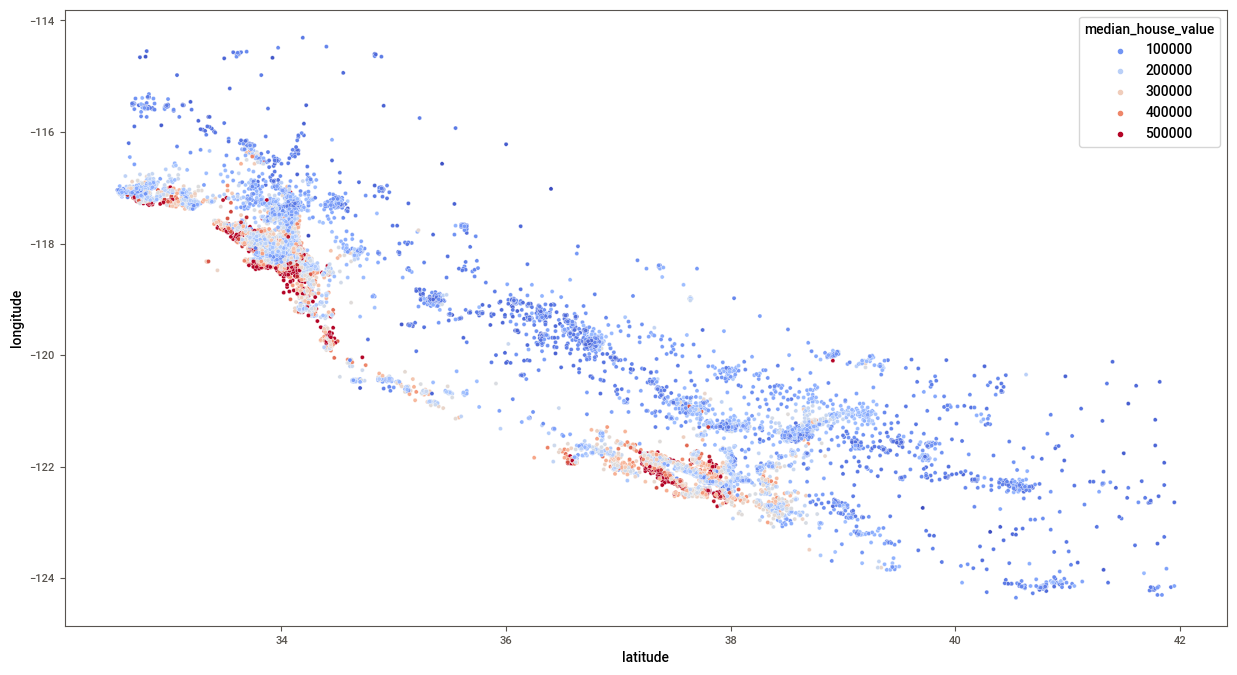

In [57]:
# visualize the cordinates to visualize how the individual proximities influence the target price
plt.figure(figsize = (15,8))
sns.scatterplot (x ='latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm' )

from the visual above the darker the red is the higher the value is, we can see that houses close to the ocean tend to be more expensive

## FEATURE ENGINEERING

In [ ]:
# A little feature engineering to merge some existing festures together to create a better one
